In [4]:
%load_ext autoreload

%autoreload 2
import pandas as pd 
import numpy as np
import Functions.Import_Data as ID
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import shutil

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Defining folder path to load data

In [10]:
folder_path = "D:\Dropbox\FEFLOW_MDA_MPMW_500_20_amplifie\\"
path_data = folder_path+ "Data\\"

assim_number = 0

## Loading simulation data for each simulation

In [11]:
for i in range(5):
    
    ID.resample_time(path_data+'Assim_'+str(i)+'/Head/',path_data+'Assim_'+str(i)+'/Head_resampled/')
    ID.load_results(i,folder_path)


measured_head = ID.Measure(path_data+'/Assim_'+str(assim_number)+'/measured_head.txt')

observed_head = ID.Observation(path_data+'/Assim_'+str(assim_number)+'/observed_head.txt')
observed_head_1 = ID.Observation(path_data+'/Assim_'+str(assim_number+1)+'/observed_head.txt')
observed_head_2 = ID.Observation(path_data+'/Assim_'+str(assim_number+2)+'/observed_head.txt')
observed_head_3 = ID.Observation(path_data+'/Assim_'+str(assim_number+3)+'/observed_head.txt')
observed_head_4 = ID.Observation(path_data+'/Assim_'+str(assim_number+4)+'/observed_head.txt')

# Plotting Data for each well

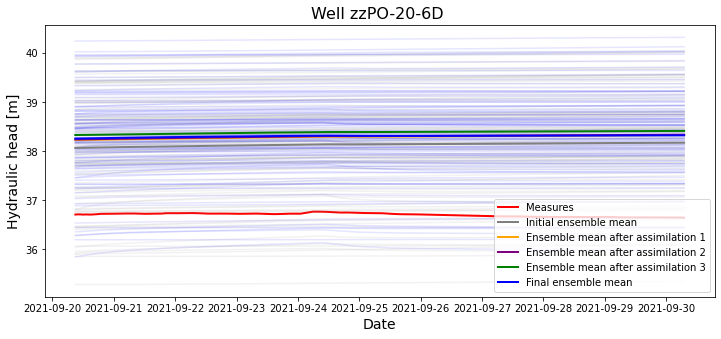

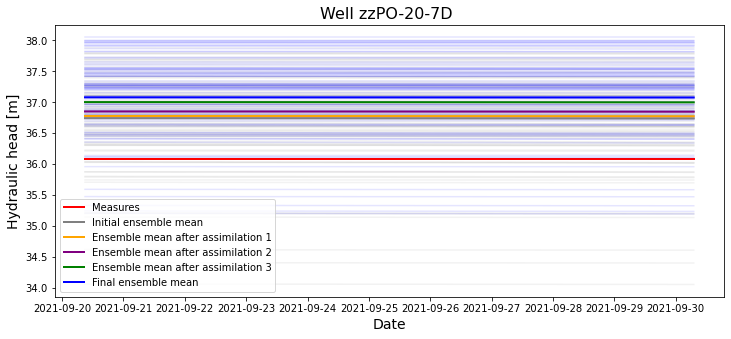

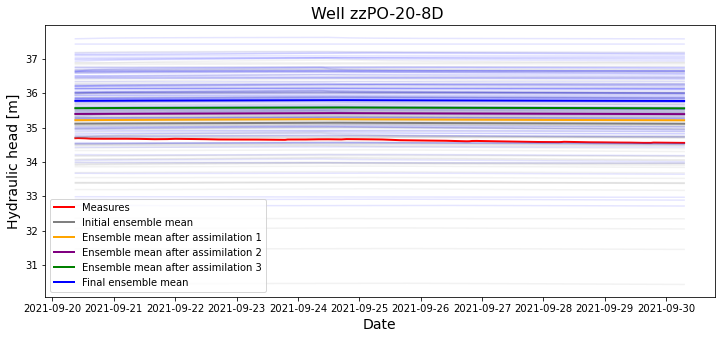

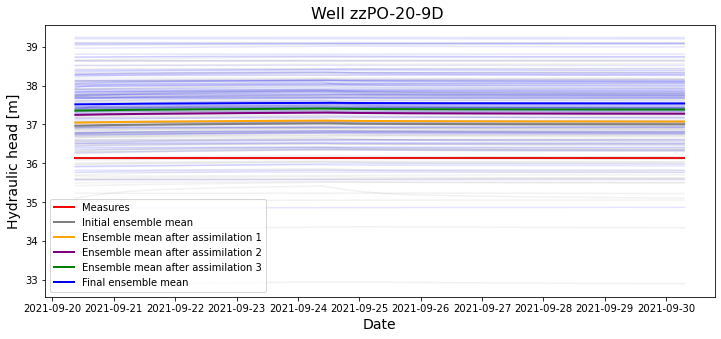

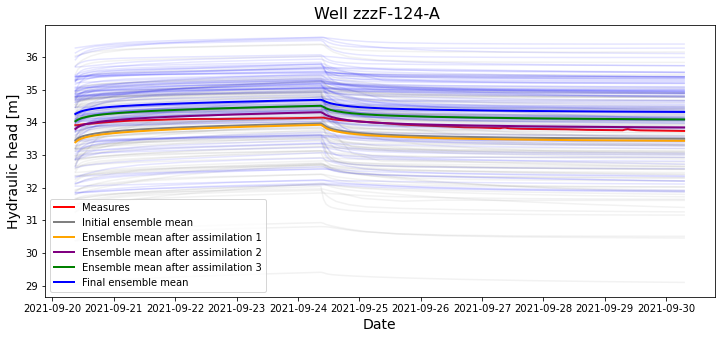

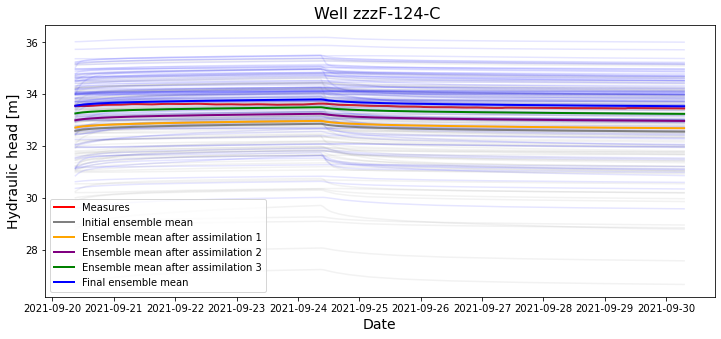

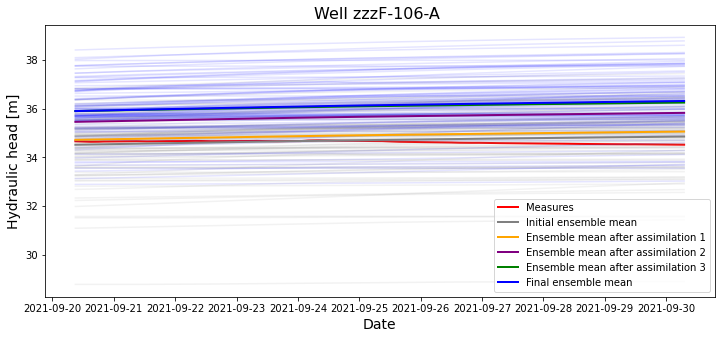

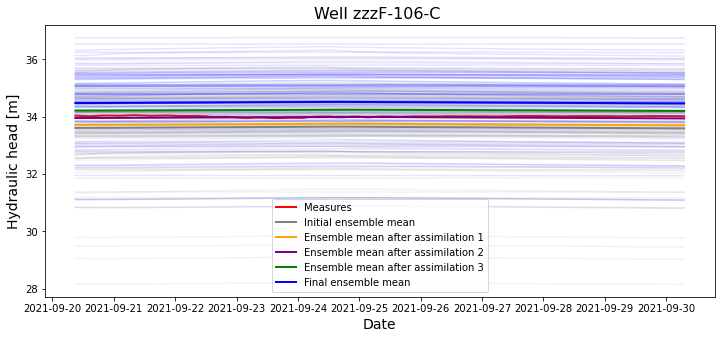

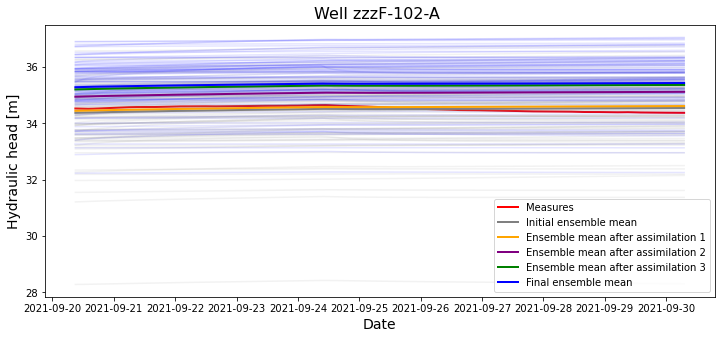

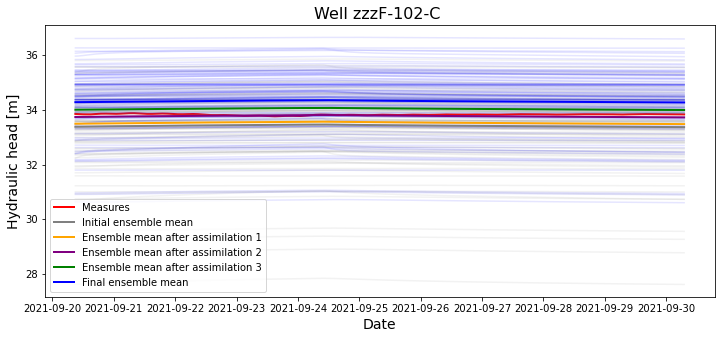

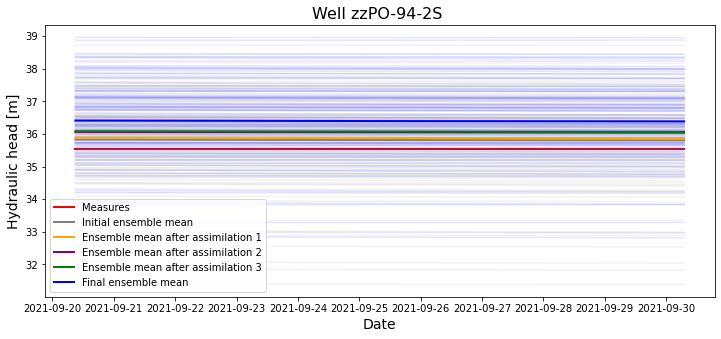

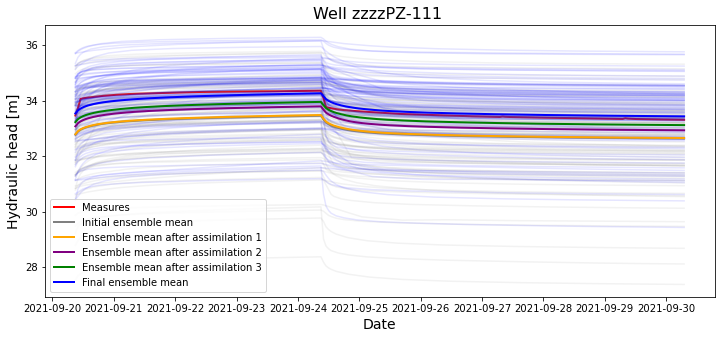

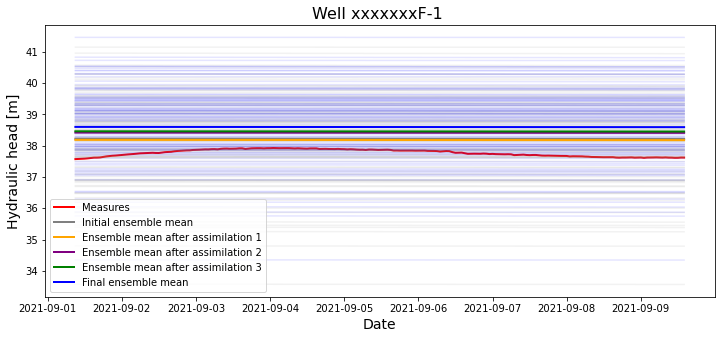

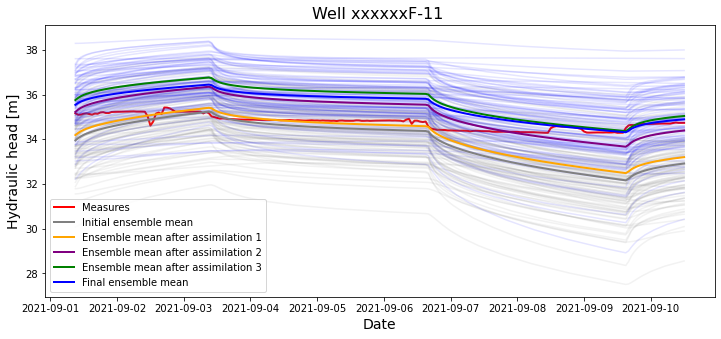

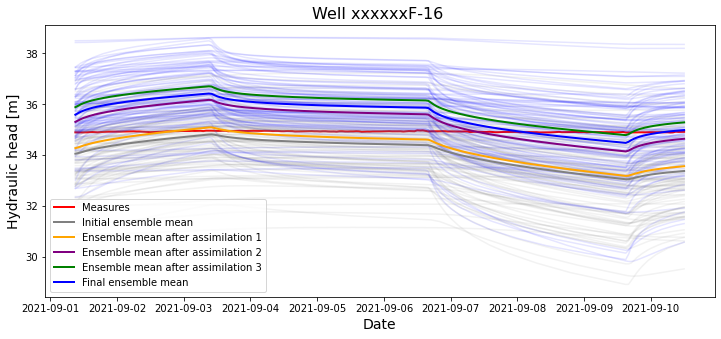

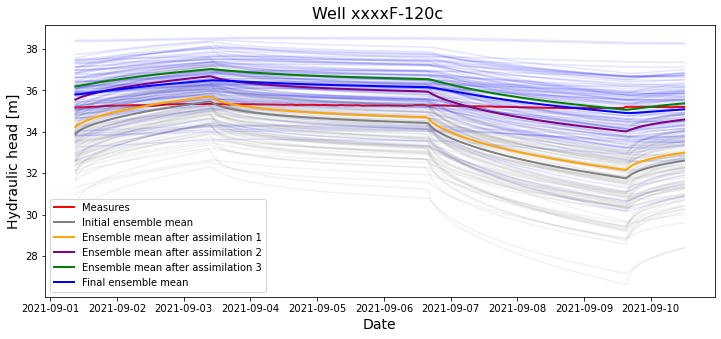

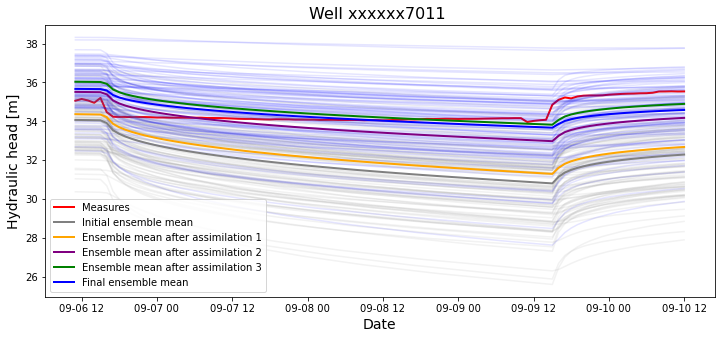

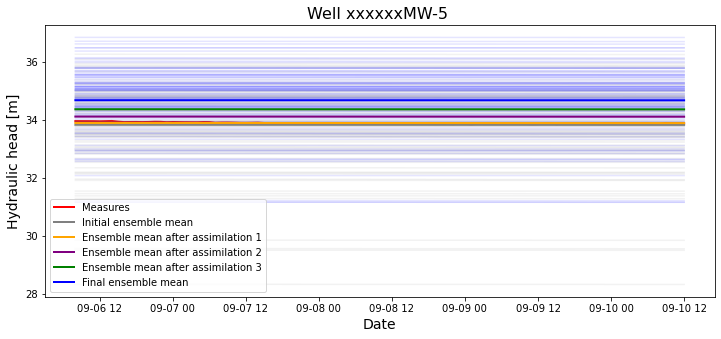

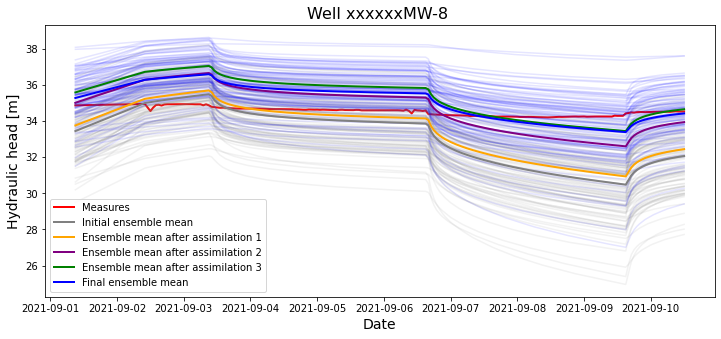

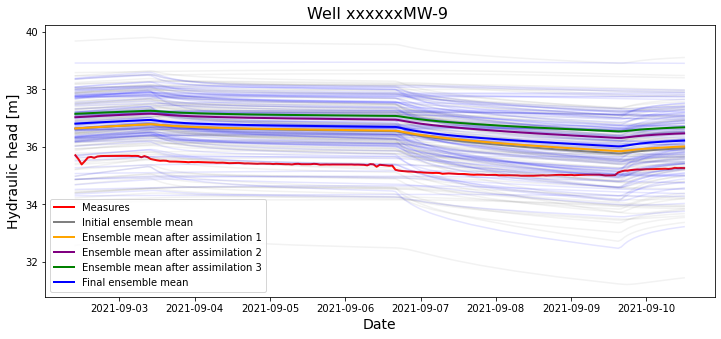

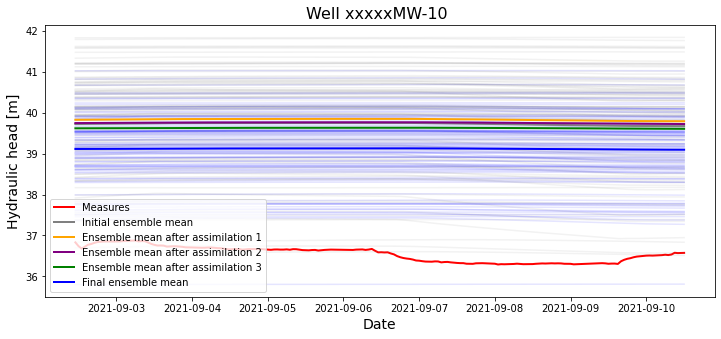

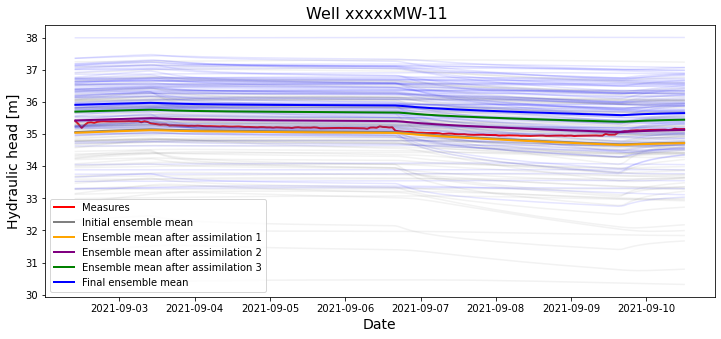

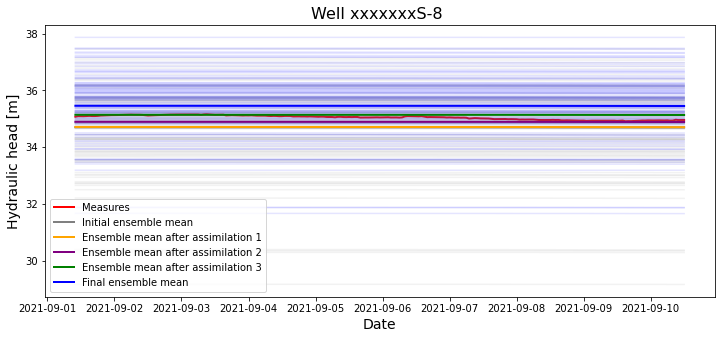

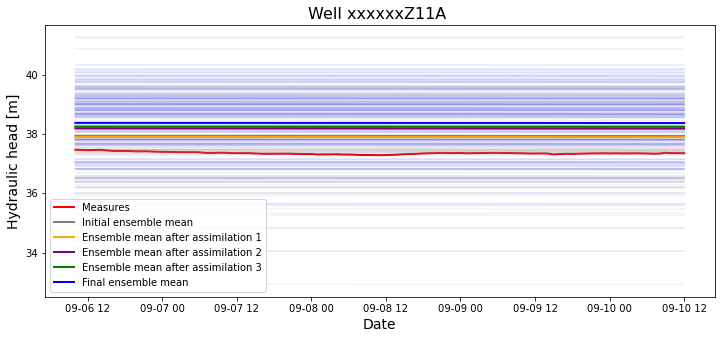

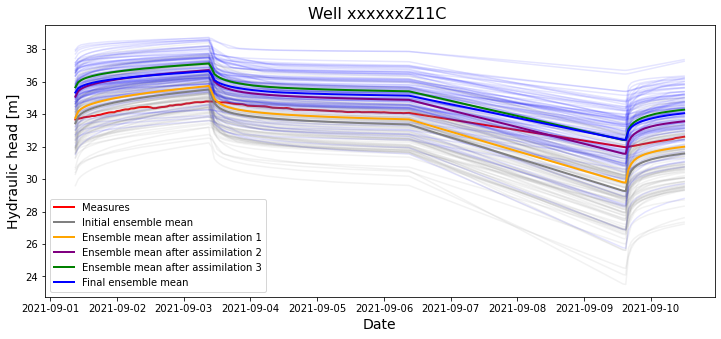

In [12]:
# 25 wells in this case
for i in range(25) : 
    
    plt.figure(figsize=(12,5))
    plt.plot(measured_head.wells[i].get_well_data()[0],measured_head.wells[i].get_well_data()[1],c='r',lw=2,label='Measures')
    
    #Initializing the mean for each ensemble
    mean = np.zeros(len(measured_head.wells[i].get_well_data()[0]))
    mean_1 = np.zeros(len(measured_head.wells[i].get_well_data()[0]))
    mean_2 = np.zeros(len(measured_head.wells[i].get_well_data()[0]))
    mean_3 = np.zeros(len(measured_head.wells[i].get_well_data()[0]))
    mean_4 = np.zeros(len(measured_head.wells[i].get_well_data()[0]))

    # For each assimilation and subsequent simulation, user can define to plot indivual realizations
    
    for j in range(observed_head.ensemble_size):
        plt.plot(observed_head.wells[i][j].get_well_data()[0],observed_head.wells[i][j].get_well_data()[1],c='gray',alpha=0.1)
        mean += observed_head.wells[i][j].get_well_data()[1]/observed_head.ensemble_size
        
    for j in range(observed_head_1.ensemble_size):
        #plt.plot(observed_head_1.wells[i][j].get_well_data()[0],observed_head_1.wells[i][j].get_well_data()[1],c='orange',alpha=0.1)
        mean_1 += observed_head_1.wells[i][j].get_well_data()[1]/observed_head_1.ensemble_size  
    
    for j in range(observed_head_2.ensemble_size):
        #plt.plot(observed_head_2.wells[i][j].get_well_data()[0],observed_head_2.wells[i][j].get_well_data()[1],c='purple',alpha=0.1)
        mean_2 += observed_head_2.wells[i][j].get_well_data()[1]/observed_head_2.ensemble_size    
    
    for j in range(observed_head_3.ensemble_size):
        #plt.plot(observed_head_3.wells[i][j].get_well_data()[0],observed_head_3.wells[i][j].get_well_data()[1],c='green',alpha=0.1)
        mean_3 += observed_head_3.wells[i][j].get_well_data()[1]/observed_head_3.ensemble_size 
       
    for j in range(observed_head_4.ensemble_size):
        plt.plot(observed_head_4.wells[i][j].get_well_data()[0],observed_head_4.wells[i][j].get_well_data()[1],c='b',alpha=0.1)
        mean_4 += observed_head_4.wells[i][j].get_well_data()[1]/observed_head_4.ensemble_size        

    
    plt.title('Well '+measured_head.wells[i].name,fontsize=16)
    plt.plot(observed_head.wells[i][j].get_well_data()[0],mean,c='gray',lw=2,label='Initial ensemble mean')
    plt.plot(observed_head_1.wells[i][j].get_well_data()[0],mean_1,c='orange',lw=2,label='Ensemble mean after assimilation 1')
    plt.plot(observed_head_2.wells[i][j].get_well_data()[0],mean_2,c='purple',lw=2,label='Ensemble mean after assimilation 2')
    plt.plot(observed_head_3.wells[i][j].get_well_data()[0],mean_3,c='green',lw=2,label='Ensemble mean after assimilation 3')
    plt.plot(observed_head_4.wells[i][j].get_well_data()[0],mean_4,c='b',lw=2,label='Final ensemble mean')
    
    
    plt.ylabel('Hydraulic head [m]',fontsize=14)
    plt.xlabel('Date',fontsize=14)
    plt.legend()
    plt.show()